In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('datasets/housing_train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
data =data[['GarageQual','FireplaceQu','SalePrice']]

In [6]:
data

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500
2,TA,TA,223500
3,TA,Gd,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,TA,Gd,266500
1458,TA,NaN,142125


In [7]:
data.isnull().mean()*100

GarageQual      5.547945
FireplaceQu    47.260274
SalePrice       0.000000
dtype: float64

In [8]:
data['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

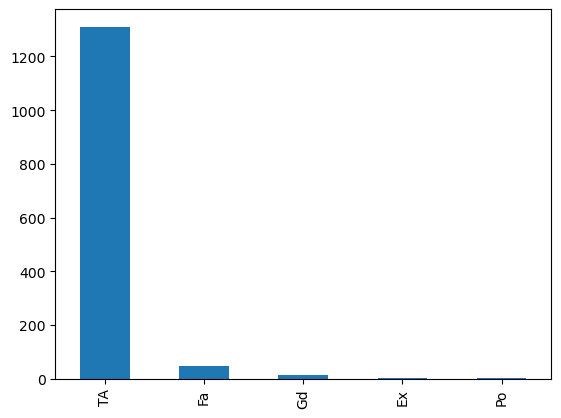

In [9]:
data['GarageQual'].value_counts().plot(kind='bar')
plt.show()

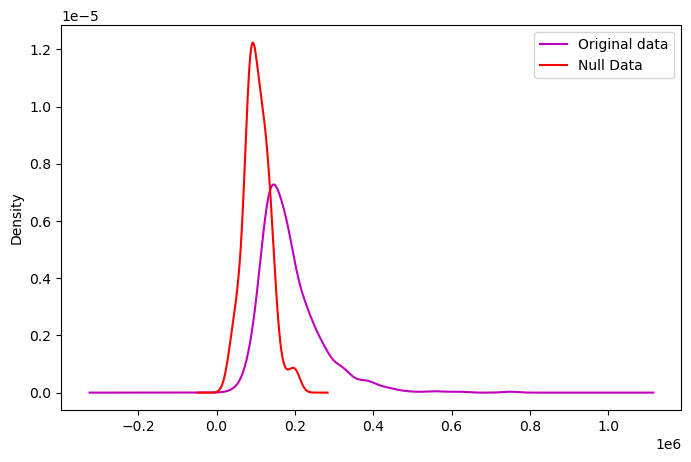

In [10]:
fig= plt.figure(figsize=(8,5))
ax = fig.add_subplot()

data[data['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde',ax=ax,color='m')
data[data['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='r')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original data','Null Data']
ax.legend(lines,labels)

In [11]:
temp = data[data['GarageQual']=='TA']['SalePrice']

In [12]:
data['GarageQual'].fillna('TA', inplace=True)

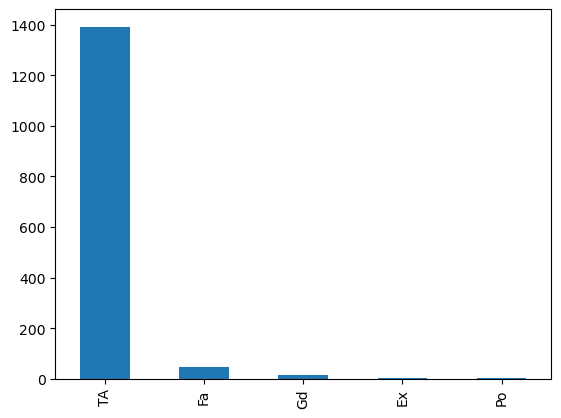

In [13]:
data['GarageQual'].value_counts().plot(kind='bar')
plt.show()

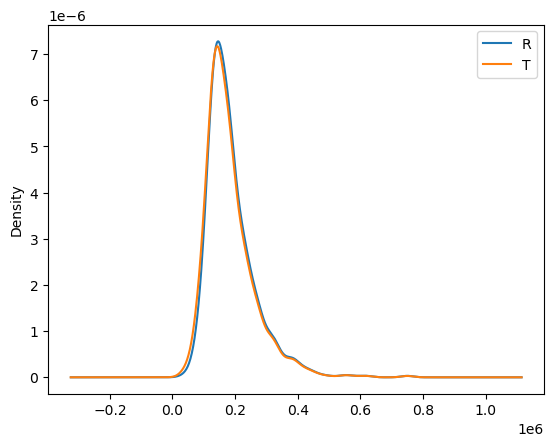

In [14]:
fig = plt.figure()
ax = fig.add_subplot()


temp.plot(kind='kde', ax=ax)

data[data['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)

lines,labels = ax.get_legend_handles_labels()
labels = ['R','T']
ax.legend(lines,labels)
plt.show()

In [15]:
data['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

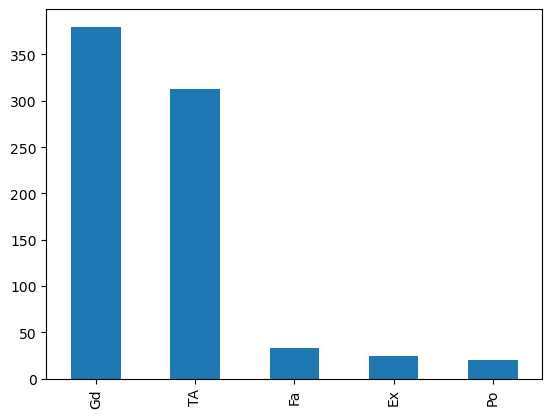

In [16]:
data['FireplaceQu'].value_counts().plot(kind='bar')
plt.show()

In [17]:
temp = data[data['FireplaceQu']=='Gd']['SalePrice']

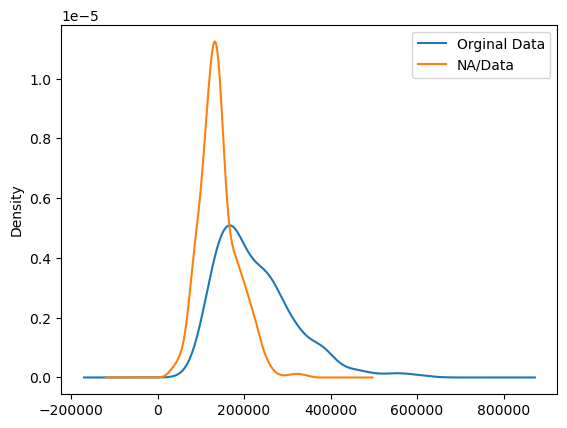

In [18]:
# SalePrice
fig,ax = plt.subplots(ncols=1)
data[data['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)
data[data['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax)

lines,labels = ax.get_legend_handles_labels()
labels = ['Orginal Data','NA/Data']
ax.legend(lines,labels)
plt.show()

In [19]:
data['FireplaceQu'].fillna('Gd', inplace=True)

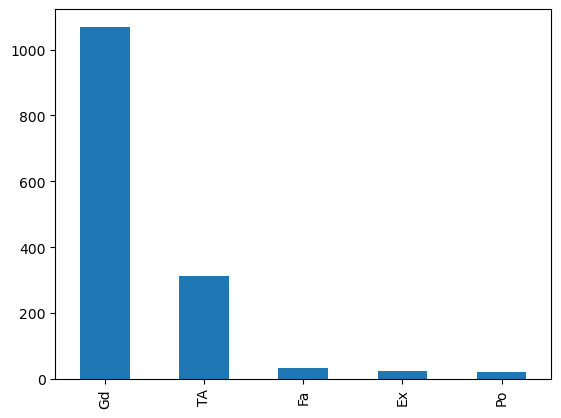

In [20]:
data['FireplaceQu'].value_counts().plot(kind='bar')
plt.show()

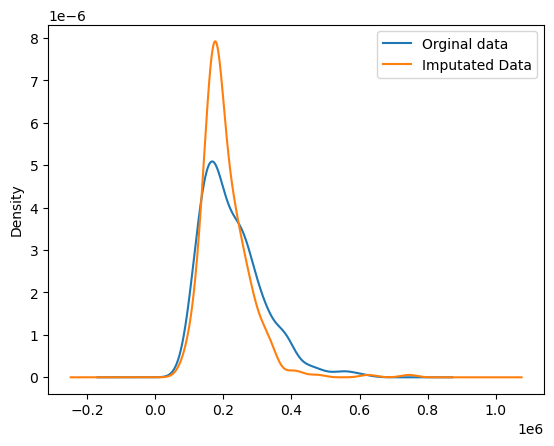

In [21]:
fig = plt.figure()
ax = fig.add_subplot()


temp.plot(kind='kde', ax=ax)

data[data['FireplaceQu']=='TA']['SalePrice'].plot(kind='kde',ax=ax)

lines,labels = ax.get_legend_handles_labels()
labels = ['Orginal data','Imputated Data']
ax.legend(lines,labels)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop(columns=['SalePrice']),data['SalePrice'],test_size=0.2)

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [24]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

/home/shohel/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [25]:
imputer.statistics_

array(['TA', 'Gd'], dtype=object)

In [26]:

df = pd.read_csv('datasets/housing_train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

<AxesSubplot:>

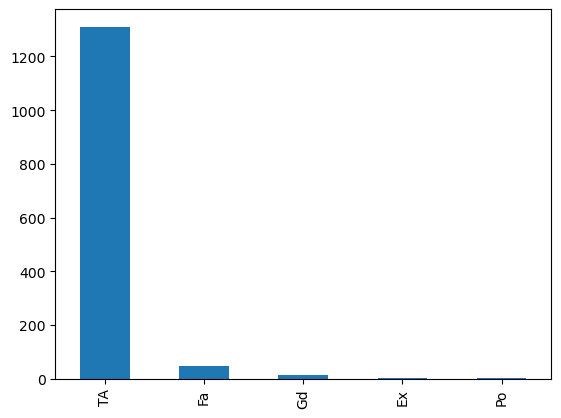

In [28]:
df['GarageQual'].value_counts().plot(kind='bar')

<AxesSubplot:>

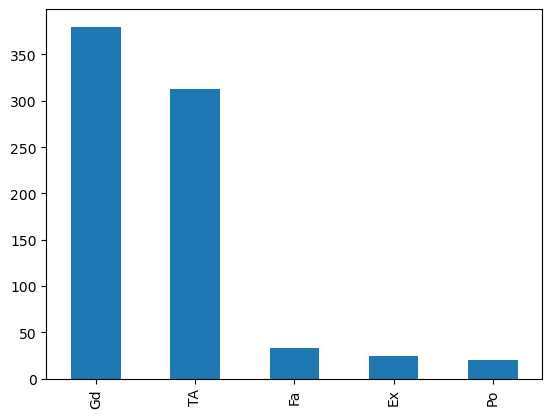

In [29]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [31]:
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [32]:
df['GarageQual'].fillna('Missing', inplace=True)
df['FireplaceQu'].fillna('Missing', inplace=True)

<AxesSubplot:>

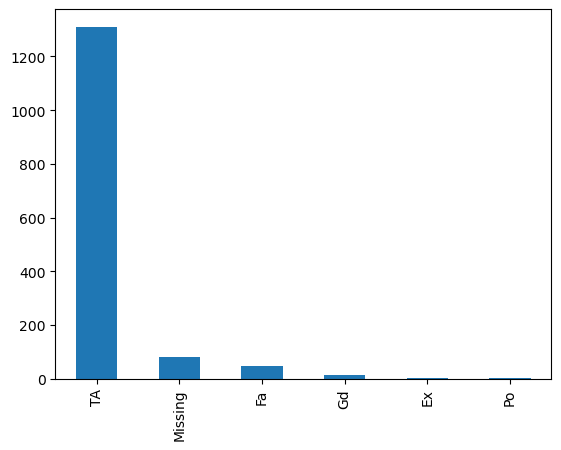

In [33]:
df['GarageQual'].value_counts().plot(kind='bar')

<AxesSubplot:>

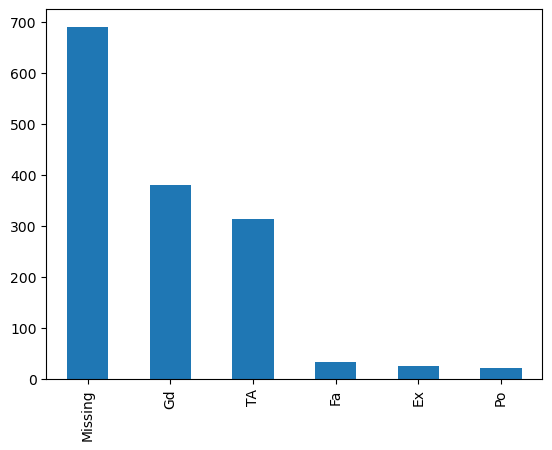

In [34]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [35]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)